-----
<h1 style="color: #191970; font-weight: bold; text-align: center;">CASE PYTHON - Jump Start</h1>
<h4 style="font-style: italic; text-align: center;">Nayara de Oliveira Brabo</h4>
<p style="font-style: italic; text-align: center;">15/07/2024</p>

-----

<h2 style="color: #191970; font-weight: bold; text-align: center;">BIBLIOTECAS</h2>

In [1]:
import pandas as pd
from babel import Locale
import matplotlib.pyplot as plt
import seaborn as sns


-----

<h2 style="color: #191970; font-weight: bold; text-align: center;">IMPORTANDO AS BASES DE DADOS</h2>

<h5 style="color: #191970; font-weight: bold; font-size: 18px;">TITLE BASICS - Descrição dos Campos</h5>

<style>
    ul {
        list-style-type: none;
        padding: 0;
    }
    li {
        margin: 10px 0;
        font-size: 14px;
    }
    li::before {
        content: "> ";
        color: #191970;
        font-weight: bold;
    }
</style>

<ul>
    <li><strong>tconst (string)</strong> - identificador alfanumérico único do título</li>
    <li><strong>titleType (string)</strong> – o tipo/formato do título (ex.: filme, curta, série de TV, episódio de TV, vídeo, etc.)</li>
    <li><strong>originalTitle (string)</strong> – o título original / No idioma original</li>
    <li><strong>primaryTitle (string)</strong> – o título mais popular / o título usado pelos cineastas em materiais promocionais no momento do lançamento</li>
    <li><strong>startYear (YYYY)</strong> – representa o ano de lançamento de um título. No caso de séries de TV, é o ano de início da série</li>
    <li><strong>runtimeMinutes</strong> – duração principal do título, em minutos</li>
    <li><strong>genres (array de strings)</strong> – inclui até três gêneros associados ao título</li>
</ul>


- Importar a base de dados

In [2]:
df_basics = pd.read_csv(r'C:\Users\nayar\Documents\START\CASE_python\database\title.basics.tsv', sep='\t', usecols = ['tconst', 'titleType','originalTitle', 'primaryTitle','startYear','runtimeMinutes', 'genres'], low_memory=False, na_values='\\N')

- Filtrar apenas o que é considerado filme:
    - movie
    - tvMovie
    - short
    - tvShort
- Filtrar apenas os títulos que não estão vazios
- Filtrar apenas os filmes com startYear < 2024

In [3]:
# Filtrar o tipo do item
basics_filtrado = df_basics.query("titleType in ['movie', 'tvMovie', 'short', 'tvShort']")
len(basics_filtrado)

1848287

In [4]:
# Filtrar titulo em branco
basics_filtrado = basics_filtrado.dropna(subset=['originalTitle'])
len(basics_filtrado)

1848282

In [5]:
# Filtrar ano de estreia < 2024
basics_filtrado = basics_filtrado.query('startYear <= 2024')
len(basics_filtrado)

1705722

- Criar coluna com a categoria de duração do filme

<style>
    ul {
        list-style-type: none;
        padding: 0;
    }
    li {
        margin: 10px 0;
        font-size: 14px;
    }
    li::before {
        content: "> ";
        color: #191970;
        font-weight: bold;
    }
</style>

<p>Segundo a ancine:</p> 
<ul>
    <li><strong>curta-metragem</strong> - aquela cuja duração é igual ou inferior a quinze minutos;</li>
    <li><strong>média-metragem</strong> – aquela cuja duração é superior a quinze minutos e igual ou inferior a setenta minutos;</li>
    <li><strong>longa-metragem</strong> – aquela cuja duração é superior a setenta minutos.</li>
</ul>


In [6]:
# Converter a coluna runtimeMinutes para inteiro (ignorar erros em valores não convertíveis)
basics_filtrado['runtimeMinutes'] = pd.to_numeric(basics_filtrado['runtimeMinutes'], errors='coerce').fillna(0).astype(int)

basics_filtrado = basics_filtrado.astype(
    {
        'startYear': 'int',
    }
)

def class_duracao(duracao):
    if duracao == 0:
        return 'sem dados'
    elif duracao <= 15:
        return 'curta-metragem'
    elif 15 < duracao <= 70:
        return 'media-metragem'
    else:
        return 'longa-metragem'

In [7]:
basics_filtrado['categoria_duracao'] = basics_filtrado['runtimeMinutes'].apply(class_duracao)
basics_filtrado

,tconst,titleType,primaryTitle,originalTitle,startYear,runtimeMinutes,genres,categoria_duracao
0,tt0000001,short,Carmencita,Carmencita,1894,1,"Documentary,Short",curta-metragem
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,1892,5,"Animation,Short",curta-metragem
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,1892,5,"Animation,Comedy,Romance",curta-metragem
3,tt0000004,short,Un bon bock,Un bon bock,1892,12,"Animation,Short",curta-metragem
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,1893,1,"Comedy,Short",curta-metragem
...,...,...,...,...,...,...,...,...
10916195,tt9916730,movie,6 Gunn,6 Gunn,2017,116,Drama,longa-metragem
10916205,tt9916754,movie,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,2013,49,Documentary,media-metragem
10916206,tt9916756,short,Pretty Pretty Black Girl,Pretty Pretty Black Girl,2019,0,Short,sem dados
10916210,tt9916764,short,38,38,2018,0,Short,sem dados


<h4 style="font-weight: bold; text-align: center;">-----------------------------------</h4>

<h5 style="color: #191970; font-weight: bold; font-size: 18px;">Filtro para o TCONST e ORIGINALtITLE</h5>

In [8]:
# Obter a lista de tconsts filtrados

id_filtrado = basics_filtrado['tconst']

In [9]:
# Obter a lista de originalTitle filtrados

originalTitle = basics_filtrado ['originalTitle']

<h4 style="font-weight: bold; text-align: center;">-----------------------------------</h4>

<h5 style="color: #191970; font-weight: bold; font-size: 18px;">TITLE RATINGS - Descrição dos Campos</h5>

<style>
    ul {
        list-style-type: none;
        padding: 0;
    }
    li {
        margin: 10px 0;
        font-size: 14px;
    }
    li::before {
        content: "> ";
        color: #191970;
        font-weight: bold;
    }
</style>

<ul>
    <li><strong>tconst (string)</strong> - identificador alfanumérico único do título</li>
    <li><strong>averageRating</strong> – média ponderada de todas as classificações individuais dos usuários</li>
    <li><strong>numVotes</strong> - número de votos que o título recebeu</li>
</ul>


In [10]:
df_ratings = pd.read_csv(r"C:\Users\nayar\Documents\START\CASE_python\database\title.ratings.tsv", delimiter='\t', low_memory=False)

ratings_filtrado = df_ratings.query("tconst in @id_filtrado")


In [11]:
len(ratings_filtrado)

529024

<h4 style="font-weight: bold; text-align: center;">-----------------------------------</h4>

<h5 style="color: #191970; font-weight: bold; font-size: 18px;">MESCLANDO OS DF: TITLE.BASICS COM O TITLE.RATINGS</h5>

<style>
    ul {
        list-style-type: none;
        padding: 0;
    }
    li {
        margin: 10px 0;
        font-size: 14px;
    }
    li::before {
        content: "> ";
        color: #191970;
        font-weight: bold;
    }
</style>

<ul>
    <li><strong>tconst (string)</strong> - identificador alfanumérico único do título</li>
    <li><strong>titleType (string)</strong> – o tipo/formato do título (ex.: filme, curta, série de TV, episódio de TV, vídeo, etc.)</li>
    <li><strong>primaryTitle (string)</strong> – o título mais popular / o título usado pelos cineastas em materiais promocionais no momento do lançamento</li>
    <li><strong>isAdult (booleano)</strong> - 0: título não adulto; 1: título adulto</li>
    <li><strong>startYear (YYYY)</strong> – representa o ano de lançamento de um título. No caso de séries de TV, é o ano de início da série</li>
    <li><strong>runtimeMinutes</strong> – duração principal do título, em minutos</li>
    <li><strong>genres (array de strings)</strong> – inclui até três gêneros associados ao título</li>
    <li><strong>averageRating</strong> – média ponderada de todas as classificações individuais dos usuários</li>
    <li><strong>numVotes</strong> - número de votos que o título recebeu</li>
</ul>


In [12]:
df_basics_ratings = pd.merge(
    basics_filtrado,
    ratings_filtrado,
    left_on='tconst',
    right_on='tconst', 
    how='left'
)

In [13]:
df_basics_ratings.dtypes 

tconst                object
titleType             object
primaryTitle          object
originalTitle         object
startYear              int32
runtimeMinutes         int32
genres                object
categoria_duracao     object
averageRating        float64
numVotes             float64
dtype: object

In [19]:
len(df_basics_ratings)

1705722

<h4 style="font-weight: bold; text-align: center;">-----------------------------------</h4>

<h5 style="color: #191970; font-weight: bold; font-size: 18px;">TITLE AKAS - Descrição dos Campos</h5>

<style>
    ul {
        list-style-type: none;
        padding: 0;
    }
    li {
        margin: 10px 0;
        font-size: 14px;
    }
    li::before {
        content: "> ";
        color: #191970;
        font-weight: bold;
    }
</style>

<ul>
    <li><strong>ordering (integer)</strong> – um número para identificar exclusivamente as linhas para um determinado `titleId`</li>
    <li><strong>title (string)</strong> – o título localizado</li>
    <li><strong>region (string)</strong> - a região para esta versão do título</li>
    <li><strong>language (string)</strong> - o idioma do título</li>
</ul>


In [15]:
df_akas = pd.read_csv(r"C:\Users\nayar\Documents\START\CASE_python\database\title.akas.tsv", sep='\t', usecols = ['ordering', 'title', 'region','language'], na_values='\\N')

In [16]:
len(df_akas)

48896834

- Filtrar por títilo original do filme
- Filtrar por região que o valor NÃO é nulo
- Filtrar por idioma que É nulo

In [17]:
akas_filtrado = df_akas.query("title in @originalTitle")

akas_filtrado = akas_filtrado.query("region.notna() & language.isna()")

In [18]:
akas_filtrado

,ordering,title,region,language
1,2,Carmencita,DE,NaN
2,3,Carmencita,US,NaN
12,5,Le clown et ses chiens,FR,NaN
18,3,Pauvre Pierrot,FR,NaN
29,5,Un bon bock,FR,NaN
...,...,...,...,...
48896500,2,Hay Que Ser Paciente,CO,NaN
48896515,2,Chico Albuquerque - Revelações,BR,NaN
48896517,2,Pretty Pretty Black Girl,US,NaN
48896536,2,38,US,NaN


-----

<h2 style="color: #191970; font-weight: bold; text-align: center;">FUNÇÕES</h2>

In [15]:
def formatar_separacao_milhar(valor):
    return f"{valor:,}".replace(',', '.')

--------

<h2 style="color: #191970; font-weight: bold; text-align: center;">EXERCÍCIOS</h2>

<h5 style="color: #191970; font-weight: bold;">EXERCÍCIO 1</h5>
<p>Quais são as categorias de filmes mais comuns no IMDB?</p>

In [20]:
# Dividir os gêneros
df_generos = df_basics_ratings['genres'].str.split(',').explode()
df_generos = pd.DataFrame({'generos': df_generos, 'categoria_duracao': df_basics_ratings['categoria_duracao']})

# Função para contar os gêneros por categoria de duração
def contar_generos(categoria):
    total = df_generos[df_generos['categoria_duracao'] == categoria]['generos'].count() # contagem para a %
    contagem = df_generos[df_generos['categoria_duracao'] == categoria]['generos'].value_counts().reset_index() # dividir por categ de duração
    contagem.columns = ['genero', f'count_{categoria.replace("-", "_")}'] # nome das colunas
    contagem[f'count_{categoria.replace("-", "_")}'] = contagem[f'count_{categoria.replace("-", "_")}'].apply(formatar_separacao_milhar) #formatar milhar
    contagem[f'percent_{categoria.replace("-", "_")}'] = (contagem[f'count_{categoria.replace("-", "_")}'].str.replace('.', '').astype(int) / total * 100).round(2).astype(str) + '%'
    contagem.index = contagem.index + 1 #index começar no 1 para o top 10
    return contagem

# Contar os gêneros para cada categoria de duração
contagem_curta_metragem = contar_generos('curta-metragem')
contagem_media_metragem = contar_generos('media-metragem')
contagem_longa_metragem = contar_generos('longa-metragem')

In [21]:
print('\033[1m TOP 10 \033[0m'.center(68))
print('\033[1m GÊNEROS MAIS COMUNS NO IMDB PARA CURTA-METRAGEM\033[0m'.center(68))
contagem_curta_metragem.head(10)

                           TOP 10                           
       GÊNEROS MAIS COMUNS NO IMDB PARA CURTA-METRAGEM      


,genero,count_curta_metragem,percent_curta_metragem
1,Short,413.780,43.77%
2,Drama,133.836,14.16%
3,Comedy,96.078,10.16%
4,Documentary,51.835,5.48%
5,Animation,46.558,4.93%
6,Horror,31.472,3.33%
7,Fantasy,18.525,1.96%
8,Romance,18.126,1.92%
9,Family,17.745,1.88%
10,Thriller,17.283,1.83%


In [22]:
print('\033[1m TOP 10 \033[0m'.center(68))
print('\033[1m GÊNEROS MAIS COMUNS NO IMDB PARA MÉDIA-METRAGEM\033[0m'.center(68))
contagem_media_metragem.head(10)

                           TOP 10                           
       GÊNEROS MAIS COMUNS NO IMDB PARA MÉDIA-METRAGEM      


,genero,count_media_metragem,percent_media_metragem
1,Short,179.164,29.73%
2,Documentary,123.419,20.48%
3,Drama,99.059,16.44%
4,Comedy,45.322,7.52%
5,Horror,12.603,2.09%
6,Family,12.470,2.07%
7,Romance,12.243,2.03%
8,Biography,11.228,1.86%
9,Music,10.269,1.7%
10,Crime,10.035,1.67%


In [23]:
print('\033[1m TOP 10 \033[0m'.center(68))
print('\033[1m GÊNEROS MAIS COMUNS NO IMDB PARA LONGA-METRAGEM\033[0m'.center(68))
contagem_longa_metragem.head(10)

                           TOP 10                           
       GÊNEROS MAIS COMUNS NO IMDB PARA LONGA-METRAGEM      


,genero,count_longa_metragem,percent_longa_metragem
1,Drama,168.630,28.1%
2,Comedy,85.813,14.3%
3,Documentary,59.762,9.96%
4,Romance,37.938,6.32%
5,Action,33.215,5.54%
6,Crime,30.129,5.02%
7,Thriller,29.476,4.91%
8,Horror,22.494,3.75%
9,Adventure,19.123,3.19%
10,Mystery,14.258,2.38%


-----

<h5 style="color: #191970; font-weight: bold;">EXERCÍCIO 2</h5>
<p>Qual o número de títulos por gênero?</p>

In [28]:
contagem_generos = df_genero.value_counts().reset_index()

# Formatar a contagem dos gêneros e renomeando as colunas
contagem_generos['count'] = contagem_generos['count'].apply(formatar_separacao_milhar)
contagem_generos = contagem_generos.rename(columns={'count':'num_titulos',
                                                   'genres':'genero'})

# Calcular a porcentagem de cada gênero em relação ao total
total_generos = df_genero.count()
contagem_generos['percentual'] = (contagem_generos['num_titulos'].str.replace('.', '').astype(int) / total_generos * 100).round(2).astype(str) + '%'

print('\033[1m NÚMEROS DE TÍTULOS POR GÊNEROS\033[0m'.center(50))
contagem_generos


      NÚMEROS DE TÍTULOS POR GÊNEROS      


,genero,num_titulos,percentual
0,Short,920.418,31.17%
1,Drama,534.059,18.09%
2,Documentary,318.601,10.79%
3,Comedy,315.701,10.69%
4,Horror,85.572,2.9%
5,Romance,82.994,2.81%
6,Action,76.331,2.58%
7,Thriller,72.398,2.45%
8,Animation,72.373,2.45%
9,Crime,61.731,2.09%


-----

<h5 style="color: #191970; font-weight: bold;">EXERCÍCIO 3</h5>
<p>Qual a mediana de avaliação dos filmes Por Gênero?</p>

In [29]:
# Dividir os gêneros em linhas separadas
df_generos_mediana = df_basics_ratings.assign(genres=df_basics_ratings['genres'].str.split(',')).explode('genres')  # cria outra coluna com os valores em linha


mediana_por_genero = df_generos_mediana.groupby('genres')['averageRating'].median().reset_index() # calcula mediana
mediana_por_genero = mediana_por_genero.sort_values(by='averageRating', ascending=False).reset_index(drop=True) #organiza os valores do maior para o menor

mediana_por_genero = mediana_por_genero.rename(columns={'genres':'genero',
                                                        'averageRating':'mediana_avaliação'})

print('\033[1m MEDIANA DE AVALIAÇÃO DOS FILMES \033[0m'.center(45))
print('\033[1m POR GÊNEROS \033[0m'.center(45))

mediana_por_genero

   MEDIANA DE AVALIAÇÃO DOS FILMES   
             POR GÊNEROS             


,genero,mediana_avaliação
0,Documentary,7.2
1,News,7.1
2,Biography,7.0
3,Music,7.0
4,History,7.0
5,Game-Show,6.9
6,Talk-Show,6.8
7,Short,6.8
8,Reality-TV,6.8
9,Sport,6.8


-----

<h5 style="color: #191970; font-weight: bold;">EXERCÍCIO 4</h5>
<p>Qual a mediana de avaliação dos filmes em relação ao ano de estreia?</p>

In [30]:
mediana_por_estreia = df_basics_ratings.groupby('startYear')['averageRating'].median().reset_index() # calcula a mediana 
mediana_por_estreia = mediana_por_estreia.sort_values(by='averageRating', ascending=False).reset_index(drop=True)

mediana_por_estreia = mediana_por_estreia.rename(columns={'startYear':'ano_estreia',
                                                        'averageRating':'mediana_avaliação'})

mediana_por_estreia.index = mediana_por_estreia.index + 1

In [31]:
print('\033[1m TOP 10 \033[0m'.center(43))
print('\033[1m MEDIANA DE AVALIAÇÃO DOS FILMES \033[0m'.center(43))
print('\033[1m POR ANO DE ESTREIA \033[0m'.center(43))

mediana_por_estreia.head(10)

               TOP 10              
  MEDIANA DE AVALIAÇÃO DOS FILMES  
         POR ANO DE ESTREIA        


,ano_estreia,mediana_avaliação
1,2024,7.0
2,2016,6.8
3,2023,6.8
4,1874,6.8
5,2010,6.7
6,2007,6.7
7,2022,6.7
8,2004,6.7
9,2005,6.7
10,2017,6.7


In [32]:
print('\033[1m BOTTOM 10 \033[0m'.center(43))
print('\033[1m MEDIANA DE AVALIAÇÃO DOS FILMES \033[0m'.center(43))
print('\033[1m POR ANO DE ESTREIA \033[0m'.center(43))

mediana_por_estreia.tail(10)


             BOTTOM 10             
  MEDIANA DE AVALIAÇÃO DOS FILMES  
         POR ANO DE ESTREIA        


,ano_estreia,mediana_avaliação
135,1904,4.80
136,1891,4.70
137,1903,4.70
138,1887,4.70
139,1896,4.60
140,1881,4.60
141,1898,4.60
142,1897,4.40
143,1894,4.30
144,1895,3.95


- A pessoa coloca o ano que deseja saber a mediana

In [33]:
# Função para calcular a mediana de avaliação para um ano específico
def calcular_mediana_avaliacao_ano(ano):
    filmes_ano = df_basics_ratings.query('startYear == @ano')
    if not filmes_ano.empty:
        mediana = filmes_ano['averageRating'].median()
        return mediana
    else:
        return None
    
    
# Solicitar input do usuário
while True:
    try:
        ano_input = int(input("Digite o ano para calcular a mediana de avaliação: "))
        if len(str(ano_input)) == 4:
            break
        else:
            print('\n\033[1;91mPOR FAVOR, INSIRA UM ANO VÁLIDO.\033[0m\n')
    except ValueError:
        print('\n\033[1;91mPOR FAVOR, INSIRA UM ANO VÁLIDO.\033[0m\n')
        
        

# Calcular a mediana para o ano fornecido
mediana_avaliacao = calcular_mediana_avaliacao_ano(ano_input)    

# Criar DataFrame com o resultado
if mediana_avaliacao is not None:
    df_resultado = pd.DataFrame({'Ano': [ano_input], 'Mediana de Avaliação': [mediana_avaliacao]})
    display(df_resultado)
else:
    print('\n\033[1;91mDADOS NÃO DISPONÍVEIS PARA ESSE ANO.\033[0m\n')
    


Digite o ano para calcular a mediana de avaliação:  2015


,Ano,Mediana de Avaliação
0,2015,6.7


-----

<h5 style="color: #191970; font-weight: bold;">EXERCÍCIO 5</h5>
<p> Qual o número de filmes avaliados por gênero em relação ao ano de estreia?</p>

- Dos últimos 10 anos

In [1]:
# Agrupar por ano e gênero e contar o número de filmes
contagem_generos_ano = df_generos_mediana.pivot_table(index='genres', columns='startYear', aggfunc='size', fill_value=0)

# Renomear o genres e startYear
contagem_generos_ano.columns.name = 'ano_estreia'
contagem_generos_ano.index.name = 'genero'

# Ordenar colunas por ano (decrescente)
contagem_generos_ano = contagem_generos_ano.sort_index(axis=1, ascending=False)

# Formatar os valores com separador de milhar
contagem_generos_ano = contagem_generos_ano.map((formatar_separacao_milhar))

# Exibir a tabela resultante
print('\033[1m QUANTIDADE DE FILMES POR GÊNERO NOS ÚLTIMOS 10 ANOS\033[0m'.center(100))
contagem_generos_ano.iloc[:,:12]

NameError: name 'df_generos_mediana' is not defined

C:\Users\nayar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nayar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


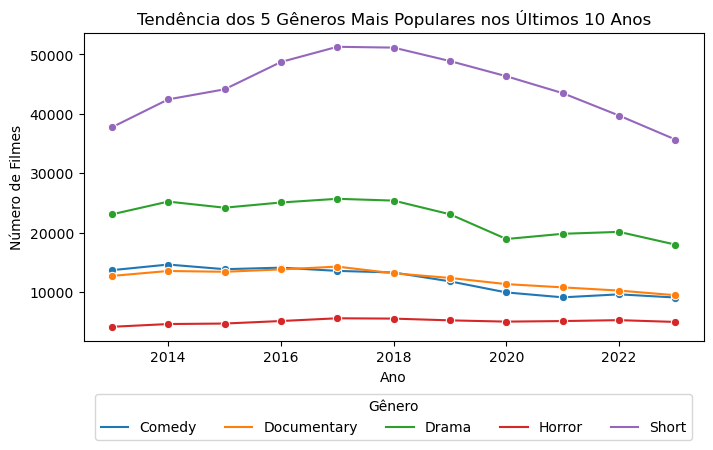

In [35]:
# Filtrar para os últimos 10 anos
df_generos_ultimos_10_anos = df_generos_mediana.query('startYear >= 2013 & startYear <= 2023')

# Agrupar por gênero e ano e contar o número de filmes
contagem_generos_ano = df_generos_ultimos_10_anos.groupby(['genres', 'startYear']).size().reset_index(name='count')

# Obter os 10 gêneros mais populares
top_5_generos = contagem_generos_ano.groupby('genres')['count'].sum().nlargest(5).index

# Filtrar os dados para incluir apenas esses gêneros
contagem_top_5_generos_ano = contagem_generos_ano.query('genres in @top_5_generos')


# Plotar a tendência dos 10 gêneros mais populares nos últimos 10 anos
plt.figure(figsize=(8, 4))
sns.lineplot(data=contagem_top_5_generos_ano, x='startYear', y='count', hue='genres', marker='o')
plt.title('Tendência dos 5 Gêneros Mais Populares nos Últimos 10 Anos')
plt.xlabel('Ano')
plt.ylabel('Número de Filmes')
plt.legend(title='Gênero', bbox_to_anchor=(0.5, -0.15), loc='upper center', ncol=5)
plt.show()


- Solicitar o ano para o usuário

In [36]:
while True:
    try:
        ano_input = int(input("Digite o ano para calcular a quantidade de filmes por gênero: "))
        if len(str(ano_input)) == 4:
            break
        else:
            print('\n\033[1;91mPOR FAVOR, INSIRA UM ANO VÁLIDO.\033[0m\n')
    except ValueError:
        print('\n\033[1;91mPOR FAVOR, INSIRA UM ANO VÁLIDO.\033[0m\n')

# Filtrar os dados para o ano fornecido
df_filtrado_ano = df_generos_mediana.query('startYear == @ano_input') #filtra o dataframe pelo ano inserido

# Agrupar por gênero e contar o número de filmes
contagem_generos_ano = df_filtrado_ano['genres'].value_counts().reset_index()
contagem_generos_ano.columns = ['genero', 'quant_filmes']
contagem_generos_ano['quant_filmes'] = contagem_generos_ano['quant_filmes'].apply((formatar_separacao_milhar))


# Criar DataFrame com o resultado
if contagem_generos_ano.empty:
    print('\n\033[1;91mDADOS NÃO DISPONÍVEIS PARA ESSE ANO.\033[0m\n')
else:
    print('\n')
    print('\033[1m QUANTIDADE DE FILMES POR\033[0m'.center(40))
    print(f'\033[1m  GÊNERO NO ANO {ano_input} \033[0m'.center(40))
    display(contagem_generos_ano)

Digite o ano para calcular a quantidade de filmes por gênero:  2012




    QUANTIDADE DE FILMES POR    
       GÊNERO NO ANO 2012       


,genero,quant_filmes
0,Short,34.212
1,Drama,20.888
2,Comedy,12.467
3,Documentary,11.858
4,Horror,3.664
5,Romance,3.549
6,Action,3.084
7,Family,2.863
8,Thriller,2.708
9,Animation,2.629


<h5 style="color: #191970; font-weight: bold;">EXERCÍCIO 6</h5>
<p>Qual o filme com maior tempo de duração? <br>Calcule os percentis considerando o tempo de duração.</p>

In [37]:
top3_duracao = df_basics_ratings.sort_values(by='runtimeMinutes', ascending=False).head(3)

# Converter runtimeMinutes para horas e minutos
top3_duracao['horas'] = top3_duracao['runtimeMinutes'] // 60  # Horas

# Formatando a duração em horas e minutos como uma string
top3_duracao['runtimeHour'] = top3_duracao.apply(lambda row: f"{row['horas']}h", axis=1)

top3_duracao[['primaryTitle', 'startYear', 'runtimeMinutes','runtimeHour', 'genres', 'averageRating', 'numVotes']]

,primaryTitle,startYear,runtimeMinutes,runtimeHour,genres,averageRating,numVotes
1131986,100,2019,59460,991h,Animation,5.8,5.0
1623842,Logistics,2012,51420,857h,Documentary,6.7,263.0
1296034,Ambiancé,2020,43200,720h,Documentary,3.2,129.0


- 1º Filme com maior duração

In [38]:
filme_maior_duracao = df_basics_ratings.loc[df_basics_ratings['runtimeMinutes'].idxmax()].copy()

# Formatando a duração em horas e minutos como uma string
filme_maior_duracao['runtimeHour'] = f"{filme_maior_duracao['runtimeMinutes'] // 60}h"

# Preparar os dados para a tabela
titulo = filme_maior_duracao['primaryTitle']
ano = filme_maior_duracao['startYear']
duracao_formatada = filme_maior_duracao['runtimeHour']
generos = filme_maior_duracao['genres']
avaliacao = filme_maior_duracao['averageRating']
votos = filme_maior_duracao['numVotes']

# Criar a tabela formatada
tabela_formatada = f"""
╔══════════════════════════════════════╗
║       FILME COM MAIOR DURAÇÃO        ║
╠════════════════════╦═════════════════╣
║ Título             ║ {titulo:<15} ║
║ Ano de Lançamento  ║ {ano:<15} ║
║ Duração            ║ {duracao_formatada:<15} ║
║ Gêneros            ║ {generos:<15} ║
║ Avaliação Média    ║ {avaliacao:<15} ║
║ Número de Votos    ║ {votos:<15,.0f} ║
╚════════════════════╩═════════════════╝
"""

# Exibir a tabela formatada
print(tabela_formatada)


╔══════════════════════════════════════╗
║       FILME COM MAIOR DURAÇÃO        ║
╠════════════════════╦═════════════════╣
║ Título             ║ 100             ║
║ Ano de Lançamento  ║ 2019            ║
║ Duração            ║ 991h            ║
║ Gêneros            ║ Animation       ║
║ Avaliação Média    ║ 5.8             ║
║ Número de Votos    ║ 5               ║
╚════════════════════╩═════════════════╝



- Calcular os percentis

In [39]:
# Calcular percentis do tempo de duração, tirando os valores nulos
percentis = df_basics_ratings.query("runtimeMinutes > 0")['runtimeMinutes'].quantile([0.25, 0.5, 0.75, 0.95])

# Resetar o índice e renomear as colunas
percentis = percentis.reset_index()
percentis.columns = ['percentil', 'tempo_duracao']

print('\033[1m PERCENTIS DO\033[0m'.center(38))
print('\033[1m TEMPO DE DURAÇÃO \033[0m'.center(38))

percentis

         PERCENTIS DO         
       TEMPO DE DURAÇÃO       


,percentil,tempo_duracao
0,0.25,10.0
1,0.50,26.0
2,0.75,84.0
3,0.95,115.0


<p style='font-size: 14px;'><strong>Percentil 25 (P25):</strong><br>O valor 10.0 indica que 25% dos filmes têm uma duração de 10 minutos ou menos. Isso significa que um quarto dos filmes do conjunto de dados tem uma duração relativamente curta.</p>

<p style='font-size: 14px;'><strong>Percentil 50 (P50):</strong><br>Também conhecido como mediana, o valor 26.0 indica que metade dos filmes têm uma duração de 26 minutos ou menos. Este é o ponto médio da distribuição dos tempos de duração dos filmes, onde 50% dos filmes são mais curtos e 50% são mais longos.</p>

<p style='font-size: 14px;'><strong>Percentil 75 (P75):</strong>O valor 84.0 indica que 75% dos filmes têm uma duração de 84 minutos (1h 24m) ou menos. Isso significa que a maioria dos filmes (três quartos) tem uma duração relativamente curta, pois estão abaixo deste valor.</p>

<p style='font-size: 14px;'><strong>Percentil 95 (P95):</strong>O valor 115.0 indica que apenas 5% dos filmes têm uma duração superior a 115 minutos (1h 55m). Este percentil destaca os filmes que têm uma duração mais longa dentro do conjunto de dados, representando os extremos superiores da distribuição.</p>



-----

<h5 style="color: #191970; font-weight: bold;">EXERCÍCIO 7</h5>
<p>Qual a relação entre duração e gênero?</p>

In [40]:
estatisticas_genero = df_generos_mediana.groupby('genres')['runtimeMinutes'].agg(['mean', 'median',  'std','count']).reset_index() # agg permite aplicar varias funções a um grupo de dados

estatisticas_genero.columns = ['genero', 'duração_media', 'duração_mediana', 'desvio_padrao', 'contagem_filmes']

# Formatando os valores média e contagem
estatisticas_genero['duração_media'] = estatisticas_genero['duração_media'].round(2)
estatisticas_genero['desvio_padrao'] = estatisticas_genero['desvio_padrao'].round(2)
estatisticas_genero['contagem_filmes'] = estatisticas_genero['contagem_filmes'].apply((formatar_separacao_milhar))


# Agrupar os dados pelo gênero e pela categoria de duração e contar as ocorrências
contagem_categorias = df_generos_mediana.groupby(['genres', 'categoria_duracao']).size().unstack(fill_value=0)
categoria_mais_comum = contagem_categorias.idxmax(axis=1)

# Converter o resultado em um DataFrame
categoria_mais_comum_df = categoria_mais_comum.reset_index()
categoria_mais_comum_df.columns = ['genero', 'categoria_duração']

# Combinar as estatísticas descritivas com a categoria de duração mais comum
resultado_final = pd.merge(
    estatisticas_genero, 
    categoria_mais_comum_df, 
    on='genero')

# Exibir o DataFrame resultante
resultado_final

,genero,duração_media,duração_mediana,desvio_padrao,contagem_filmes,categoria_duração
0,Action,51.94,30.0,52.35,76.331,longa-metragem
1,Adult,44.44,55.0,42.88,11.147,longa-metragem
2,Adventure,53.40,56.0,47.08,43.286,longa-metragem
3,Animation,15.09,6.0,222.40,72.373,curta-metragem
4,Biography,51.94,50.0,45.21,33.484,longa-metragem
5,Comedy,33.65,10.0,43.36,315.701,curta-metragem
6,Crime,56.74,68.0,47.37,61.731,longa-metragem
7,Documentary,35.91,25.0,139.31,318.601,media-metragem
8,Drama,40.61,16.0,49.60,534.059,longa-metragem
9,Family,38.32,17.0,43.14,50.314,curta-metragem


<p style='font-size: 14px;'><strong>CONCLUSÃO:</strong><br>A análise mostra que a duração dos filmes está intimamente relacionada ao gênero, com alguns gêneros tendo uma tendência natural para filmes mais longos ou mais curtos. Gêneros como Film-Noir, War, e History tendem a ser mais longos devido à complexidade e profundidade das narrativas. Em contraste, gêneros como Short, Animation, e Reality-TV tendem a ter filmes mais curtos, adaptados para segmentos mais breves.<br>Essa relação entre duração e gênero pode ser explorada estrategicamente por produtores e investidores para atender às expectativas do público e otimizar a produção de filmes em diferentes plataformas.</p>

-----

<h5 style="color: #191970; font-weight: bold;">EXERCÍCIO 9</h5>
<p>Qual o número de filmes produzidos por país?</p>

In [41]:
def get_country_name_pt(sigla):
    try:
        return locale_pt.territories[sigla.upper()]
    except KeyError:
        return 'Desconhecido'

In [42]:
# Carregar os dados locais em português
locale_pt = Locale('pt')

# Contagem de filmes por país
contagem_por_pais = akas_filtrado['region'].value_counts().reset_index()

# Adicionando coluna com nomes dos países em português
contagem_por_pais['pais'] = contagem_por_pais['region'].apply(get_country_name_pt)


contagem_por_pais.columns = ['pais_sigla', 'contagem_filmes', 'pais']
    
contagem_por_pais['contagem_filmes'] = contagem_por_pais['contagem_filmes'].apply((formatar_separacao_milhar)) # formata a contagem

contagem_por_pais.index = contagem_por_pais.index+1

print('\033[1m TOP 15 \033[0m'.center(55))
print('\033[1m PAÍSES PRODUTORES DE FILMES \033[0m'.center(55))

contagem_por_pais[['pais_sigla', 'pais', 'contagem_filmes']].head(15)


                     TOP 15                    
          PAÍSES PRODUTORES DE FILMES          


,pais_sigla,pais,contagem_filmes
1,US,Estados Unidos,826.260
2,GB,Reino Unido,291.636
3,FR,França,121.909
4,DE,Alemanha,104.706
5,AU,Austrália,98.875
6,CA,Canadá,74.405
7,IT,Itália,72.050
8,ES,Espanha,67.440
9,IN,Índia,63.174
10,MX,México,44.311


-----

<h5 style="color: #191970; font-weight: bold;">EXERCÍCIO 10</h5>
<p>Quais são os top 15 melhores filmes e 15 piores filmes?</p>

In [16]:
# Filtrar para excluir filmes do tipo 'short'
df_basics_ratings_sem_nulos = df_basics_ratings.query('averageRating.notnull() & numVotes > 100_000').copy()

df_basics_ratings_sem_nulos['numVotes'] = df_basics_ratings_sem_nulos['numVotes'].apply((formatar_separacao_milhar))

# Classificar os filmes com base na avaliação média
df_classificado = df_basics_ratings_sem_nulos.sort_values(by='averageRating', ascending=False)

# Selecionar os 15 filmes
top_15_melhores = df_classificado.head(15)
top_15_piores = df_classificado.tail(15).sort_values(by='averageRating', ascending=True)

# Resetar o índice para os DataFrames resultantes
top_15_melhores.reset_index(drop=True, inplace=True)
top_15_piores.reset_index(drop=True, inplace=True)

top_15_melhores.index = top_15_melhores.index + 1
top_15_piores.index = top_15_piores.index + 1

In [17]:
print('\033[1m TOP 15 \033[0m'.center(90))
print('\033[1m MELHORES FILMES \033[0m'.center(90))
top_15_melhores[['primaryTitle','titleType','startYear', 'averageRating','numVotes']]

                                      TOP 15                                      
                                 MELHORES FILMES                                  


,primaryTitle,titleType,startYear,averageRating,numVotes
1,The Shawshank Redemption,movie,1994,9.3,2.913.067.0
2,The Godfather,movie,1972,9.2,2.029.957.0
3,12 Angry Men,movie,1957,9.0,873.767.0
4,Schindler's List,movie,1993,9.0,1.462.366.0
5,The Lord of the Rings: The Return of the King,movie,2003,9.0,1.994.576.0
6,The Godfather Part II,movie,1974,9.0,1.374.298.0
7,The Dark Knight,movie,2008,9.0,2.894.278.0
8,Pulp Fiction,movie,1994,8.9,2.238.857.0
9,12th Fail,movie,2023,8.9,121.023.0
10,The Lord of the Rings: The Fellowship of the Ring,movie,2001,8.9,2.023.206.0


In [18]:
print('\033[1m TOP 15 \033[0m'.center(90))
print('\033[1m PIORES FILMES \033[0m'.center(90))
top_15_piores[['primaryTitle','titleType','startYear', 'averageRating','numVotes']]

                                      TOP 15                                      
                                  PIORES FILMES                                   


,primaryTitle,titleType,startYear,averageRating,numVotes
1,Radhe,movie,2021,1.9,180.033.0
2,Epic Movie,movie,2007,2.4,109.850.0
3,Adipurush,movie,2023,2.7,133.322.0
4,Meet the Spartans,movie,2008,2.8,111.858.0
5,Catwoman,movie,2004,3.4,126.377.0
6,Batman & Robin,movie,1997,3.8,269.399.0
7,The Last Airbender,movie,2010,4.0,175.541.0
8,Fifty Shades of Grey,movie,2015,4.2,338.003.0
9,Ghost Rider: Spirit of Vengeance,movie,2011,4.3,126.824.0
10,Fantastic Four,movie,2015,4.3,177.462.0


-----

<h5 style="color: #191970; font-weight: bold;">EXERCÍCIO 11</h5>
<p>Quais são os gêneros mais populares em cada década?</p>

In [53]:
# Filtrar para excluir filmes do tipo 'short'
df_basics_ratings_sem_shorts = df_basics_ratings.query("titleType != 'short'").copy()

# Extrair a década do ano de lançamento
df_basics_ratings_sem_shorts['decade'] = (df_basics_ratings_sem_shorts['startYear'] // 10) * 10

# Explodir a coluna de gêneros em múltiplas linhas
df_exploded = df_basics_ratings_sem_shorts.dropna(subset=['genres']).copy()
df_exploded['genres'] = df_exploded['genres'].str.split(',')
df_exploded = df_exploded.explode('genres')

# Contar a frequência de cada gênero por década
genero_por_decada = df_exploded.groupby(['decade', 'genres']).size().reset_index(name='count')
genero_mais_popular_por_decada = genero_por_decada.loc[genero_por_decada.groupby('decade')['count'].idxmax()]

# Renomear as colunas
genero_mais_popular_por_decada.columns = ['decada', 'genero', 'frequencia']
genero_mais_popular_por_decada['frequencia'] = genero_mais_popular_por_decada['frequencia'].apply((formatar_separacao_milhar))

print('\033[1m GÊNEROS MAIS POPULARES \033[0m'.center(48))
print('\033[1m EM CADA DÉCADA \033[0m'.center(48))

genero_mais_popular_por_decada

         GÊNEROS MAIS POPULARES         
             EM CADA DÉCADA             


,decada,genero,frequencia
0,1890,Documentary,18
8,1900,Documentary,69
27,1910,Drama,6.088
49,1920,Drama,8.895
73,1930,Drama,9.212
98,1940,Drama,6.998
123,1950,Drama,12.228
151,1960,Drama,17.487
178,1970,Drama,20.404
205,1980,Drama,22.578


-----

<h5 style="color: #191970; font-weight: bold;">EXERCÍCIO 12</h5>
<p>Faça uma análise dos filmes e mostre para o investidor uma análise gerencial dos filmes no dataset (análise livre para mostrar sua criatividade, desenvolvimento e habilidades do Python).</p>

- TENDÊNCIAS DE FILMES E SÉRIES AO LONGO DOS ÚLTIMOS 10 ANOS

In [54]:
tipo_titulo = ['movie','tvSeries','tvMiniSeries']
df_basics_filtrado = df_basics.query('titleType in @tipo_titulo')
df_basics_filtrado = df_basics_filtrado.query('originalTitle.notnull() & startYear>=2013 & startYear<=2023')


# Contar o número de filmes e séries
contagem_tipos = df_basics_filtrado['titleType'].value_counts().reset_index()
contagem_tipos.columns = ['tipo', 'contagem']

    CONTAGEM DE TIPOS     


,tipo,contagem
0,movie,200396
1,tvSeries,118203
2,tvMiniSeries,33191


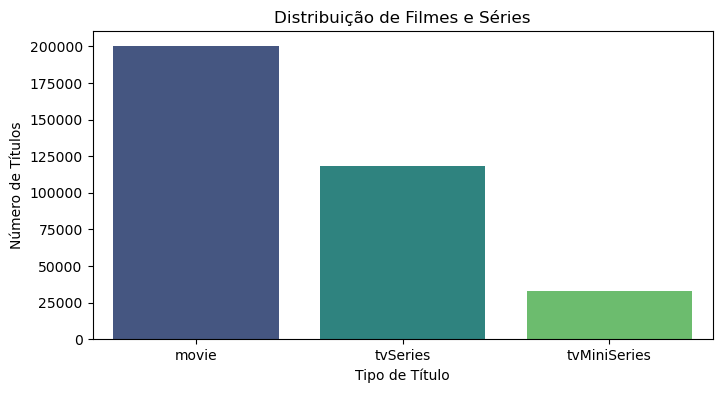

In [55]:
print('\033[1m CONTAGEM DE TIPOS \033[0m'.center(34))
display(contagem_tipos)

# Distribuição de filmes e séries
plt.figure(figsize=(8, 4))
sns.barplot(data=contagem_tipos, x='tipo', y='contagem', palette='viridis')
plt.title('Distribuição de Filmes e Séries')
plt.xlabel('Tipo de Título')
plt.ylabel('Número de Títulos')
plt.show()


C:\Users\nayar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nayar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


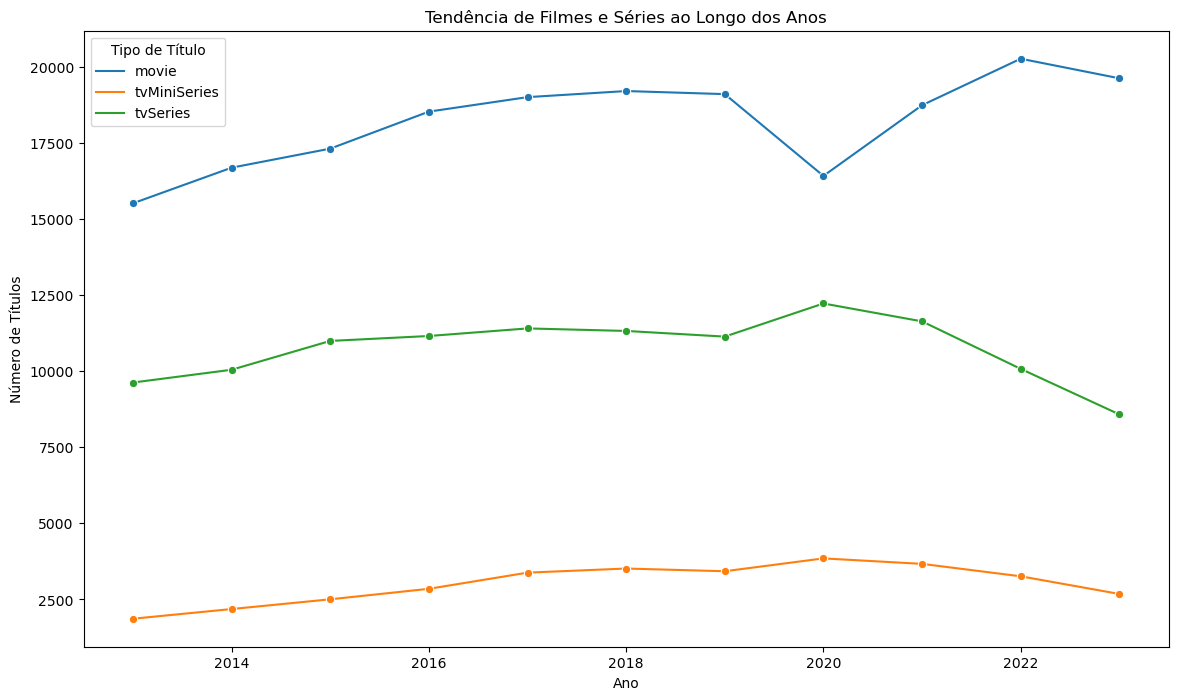

In [56]:
# Agrupar por ano e tipo de título
tendencia_ano_tipo = df_basics_filtrado.groupby(['startYear', 'titleType']).size().reset_index(name='count')

# Plotar a tendência ao longo dos últimos 10 anos
plt.figure(figsize=(14, 8))
sns.lineplot(data=tendencia_ano_tipo, x='startYear', y='count', hue='titleType', marker='o')
plt.title('Tendência de Filmes e Séries ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Número de Títulos')
plt.legend(title='Tipo de Título')
plt.show()

- QUANTIDADE DE TÍTULOS DE SÉRIE POR GÊNEROS

In [57]:
df_basics_filtrado = df_basics.query('titleType == "tvSeries" & originalTitle.notnull()')

df_genero = df_basics_filtrado['genres'].str.split(',').explode()
contagem_generos = df_genero.value_counts().reset_index()

# Formatar a contagem dos gêneros e renomeando as colunas
contagem_generos['count'] = contagem_generos['count'].apply(formatar_separacao_milhar)

contagem_generos = contagem_generos.rename(columns={'count':'num_titulos',
                                                   'genres':'genero'})

# Calcular a porcentagem de cada gênero em relação ao total
total_generos = df_genero.count()
contagem_generos['percentual'] = (contagem_generos['num_titulos'].str.replace('.', '').astype(int) / total_generos * 100).round(2).astype(str) + '%'

print('\033[1m NÚMEROS DE TÍTULOS POR GÊNEROS \033[0m'.center(50))
print('\033[1m SÉRIE \033[0m'.center(50))
contagem_generos


      NÚMEROS DE TÍTULOS POR GÊNEROS      
                  SÉRIE                   


,genero,num_titulos,percentual
0,Comedy,60.529,17.71%
1,Drama,49.257,14.41%
2,Documentary,32.583,9.53%
3,Reality-TV,24.688,7.22%
4,Talk-Show,22.997,6.73%
5,Animation,16.233,4.75%
6,Family,16.031,4.69%
7,Romance,11.103,3.25%
8,Adventure,10.730,3.14%
9,Action,10.662,3.12%


-----